In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tophu
from scipy import signal
from numpy.typing import ArrayLike, NDArray

def amp2db(x: ArrayLike) -> NDArray:
    return 20.0 * np.log10(x)

def get_filter_response_db(coeffs: ArrayLike) -> tuple[NDArray, NDArray]:
    freqs, response = signal.freqz(coeffs, fs=1.0)
    gain_db = amp2db(np.abs(response))
    return freqs, gain_db

def get_lowpass_filter_response(
    downsample_factor: int,
    shape_factor: float = 1.5,
    overhang: float = 0.5,
    ripple: float = 0.01,
    attenuation: float = 40.0,
) -> tuple[NDArray, NDArray]:
    ratio = 1.0 / downsample_factor
    bandwidth = ratio / (shape_factor + overhang - shape_factor * overhang)
    coeffs = tophu.bandpass_equiripple_filter(
        bandwidth=bandwidth,
        shape=shape_factor,
        ripple=ripple,
        attenuation=attenuation,
        force_odd_length=True,
    )
    return get_filter_response_db(coeffs)

def get_mean_filter_response(downsample_factor: int) -> tuple[NDArray, NDArray]:
    ratio = 1.0 / downsample_factor
    coeffs = np.zeros(1001)
    coeffs[:downsample_factor] = ratio
    return get_filter_response_db(coeffs)

def plot_filter_responses(downsample_factor: int) -> None:
    with plt.style.context("seaborn-talk"), plt.style.context("seaborn-whitegrid"):
        fig, ax = plt.subplots(figsize=(6, 4))
        f1, g1 = get_lowpass_filter_response(downsample_factor)
        ax.plot(f1, g1, label="Low-Pass")
        f2, g2 = get_mean_filter_response(downsample_factor)
        ax.plot(f2, g2, label="Spatial Average")
        fs = 1.0 / downsample_factor
        ax.axvline(0.5 * fs, color="black", linestyle="--", alpha=0.5)
        ax.set_ylim([-100, 5])
        plt.legend()
        fig.suptitle(f"{downsample_factor = }", fontsize=16)
        ax.set_xlabel("Normalized Frequency")
        ax.set_ylabel("Gain (dB)")
        plt.tight_layout()
        plt.show()


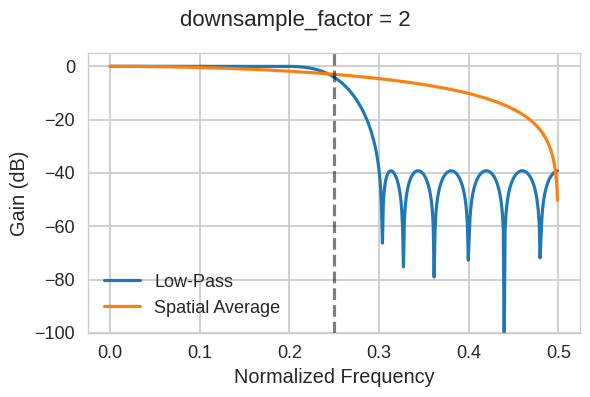

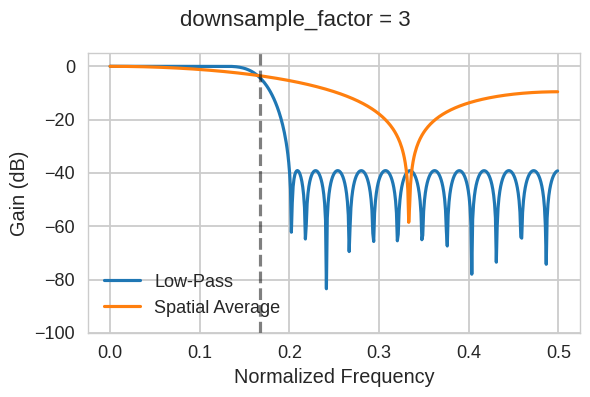

In [22]:
for df in [2, 3]:
    plot_filter_responses(downsample_factor=df)
